# 0. Install Packages

In [1]:
# # Google Drive Mount
# from google.colab import drive
# drive.mount("/content/drive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.chdir(r"C:\Users\NT-095\Desktop\study\instacart")

import torch
n_devices = torch.cuda.device_count()
print("device count:", n_devices)
for i in range(n_devices):
  print(str(i) + ": " + str(torch.cuda.get_device_name(i)))

device count: 0


# 1. Data Load

In [2]:
# aisles.csv
ais = pd.read_csv("aisles.csv")
ais[:10]

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


- aisle_id: 상품 세부 카테고리 ID
- aisle: 상품 세부 카티고리명

In [3]:
# departments.csv
dep = pd.read_csv("departments.csv")
dep[:10]

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


- department_id: 상품 카테고리 ID
- department: 상품 카테고리명

In [4]:
# order_products__prior.csv
opp = pd.read_csv("order_products__prior.csv")
opp[:10]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


- order_id: 주문 ID
- product_id: 상품 ID
- add_to_cart_order: 카트에 담은 순서
- reordered: 재구매 상품
  - 0: 최초 구매
  - 1: 재구매

In [5]:
# order_products__train.csv
opt = pd.read_csv("order_products__train.csv")
opt[:10]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


- order_id: 주문 ID
- product_id: 상품 ID
- add_to_cart_order: 카트에 담은 순서
- reordered: 재구매 상품
  - 0: 최초 구매
  - 1: 재구매

In [6]:
# orders.csv
ord = pd.read_csv("orders.csv")
ord[:10]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


- order_id: 주문 ID
- user_id: 사용자 ID
- eval_set: 로그의 evaluation
  - prior: user_id의 과거 구매
  - train: user_id의 학습데이터
  - test: user_id의 테스트데이터
- order_number: 구매 순서
- order_dow: 구매 요일
  - 0: Sunday ~ 6: Saturday
- order_hour_of_day: 구매 시간
- day_since_prior_order: 마지막 구매일로부터 걸린 시간(단위: 일)

In [7]:
# products.csv
pro = pd.read_csv("products.csv")
pro[:10]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


- product_id: 상품 ID
- product_name: 상품명
- aisle_id: 상품 세부 카테고리 ID
- department_id: 상품 카테고리 ID

# 2. Data Join

In [8]:
# product << aisle, department
product = pd.merge(pro, dep, how="inner", on="department_id")
product = pd.merge(product, ais, how="inner", on="aisle_id")
product = product[["product_id", "product_name", "department_id", "department", "aisle_id", "aisle"]]
product[:10]

,product_id,product_name,department_id,department,aisle_id,aisle
0,1,Chocolate Sandwich Cookies,19,snacks,61,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,19,snacks,61,cookies cakes
2,102,Danish Butter Cookies,19,snacks,61,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,19,snacks,61,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,19,snacks,61,cookies cakes
5,331,Organic Lemon Gingersnap,19,snacks,61,cookies cakes
6,449,Chips Ahoy! Chewy Cookies,19,snacks,61,cookies cakes
7,559,Cookie Chips Crunchy Dark Chocolate Chocolate ...,19,snacks,61,cookies cakes
8,569,Golden Cupcakes 8 Pack,19,snacks,61,cookies cakes
9,574,Crunch Vanilla Sugar Mini Cookies,19,snacks,61,cookies cakes


In [9]:
total = pd.merge(opt, opp, how="outer")
total = pd.merge(total, ord, how="right", on="order_id")
total = pd.merge(total, product, how="left", on="product_id")

del opp, opt

In [10]:
total[total["eval_set"] == "train"][:10]

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department_id,department,aisle_id,aisle
59,1187899,196.0,1.0,1.0,1,train,11,4,8,14.0,Soda,7.0,beverages,77.0,soft drinks
60,1187899,25133.0,2.0,1.0,1,train,11,4,8,14.0,Organic String Cheese,16.0,dairy eggs,21.0,packaged cheese
61,1187899,38928.0,3.0,1.0,1,train,11,4,8,14.0,0% Greek Strained Yogurt,16.0,dairy eggs,120.0,yogurt
62,1187899,26405.0,4.0,1.0,1,train,11,4,8,14.0,XL Pick-A-Size Paper Towel Rolls,17.0,household,54.0,paper goods
63,1187899,39657.0,5.0,1.0,1,train,11,4,8,14.0,Milk Chocolate Almonds,19.0,snacks,45.0,candy chocolate
64,1187899,10258.0,6.0,1.0,1,train,11,4,8,14.0,Pistachios,19.0,snacks,117.0,nuts seeds dried fruit
65,1187899,13032.0,7.0,1.0,1,train,11,4,8,14.0,Cinnamon Toast Crunch,14.0,breakfast,121.0,cereal
66,1187899,26088.0,8.0,1.0,1,train,11,4,8,14.0,Aged White Cheddar Popcorn,19.0,snacks,23.0,popcorn jerky
67,1187899,27845.0,9.0,0.0,1,train,11,4,8,14.0,Organic Whole Milk,16.0,dairy eggs,84.0,milk
68,1187899,49235.0,10.0,1.0,1,train,11,4,8,14.0,Organic Half & Half,16.0,dairy eggs,53.0,cream


In [11]:
total[total["eval_set"]=="prior"].head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department_id,department,aisle_id,aisle
0,2539329,196.0,1.0,0.0,1,prior,1,2,8,NaN,Soda,7.0,beverages,77.0,soft drinks
1,2539329,14084.0,2.0,0.0,1,prior,1,2,8,NaN,Organic Unsweetened Vanilla Almond Milk,16.0,dairy eggs,91.0,soy lactosefree
2,2539329,12427.0,3.0,0.0,1,prior,1,2,8,NaN,Original Beef Jerky,19.0,snacks,23.0,popcorn jerky
3,2539329,26088.0,4.0,0.0,1,prior,1,2,8,NaN,Aged White Cheddar Popcorn,19.0,snacks,23.0,popcorn jerky
4,2539329,26405.0,5.0,0.0,1,prior,1,2,8,NaN,XL Pick-A-Size Paper Towel Rolls,17.0,household,54.0,paper goods
5,2398795,196.0,1.0,1.0,1,prior,2,3,7,15.0,Soda,7.0,beverages,77.0,soft drinks
6,2398795,10258.0,2.0,0.0,1,prior,2,3,7,15.0,Pistachios,19.0,snacks,117.0,nuts seeds dried fruit
7,2398795,12427.0,3.0,1.0,1,prior,2,3,7,15.0,Original Beef Jerky,19.0,snacks,23.0,popcorn jerky
8,2398795,13176.0,4.0,0.0,1,prior,2,3,7,15.0,Bag of Organic Bananas,4.0,produce,24.0,fresh fruits
9,2398795,26088.0,5.0,1.0,1,prior,2,3,7,15.0,Aged White Cheddar Popcorn,19.0,snacks,23.0,popcorn jerky


In [12]:
total[total["eval_set"] == "train"].head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department_id,department,aisle_id,aisle
59,1187899,196.0,1.0,1.0,1,train,11,4,8,14.0,Soda,7.0,beverages,77.0,soft drinks
60,1187899,25133.0,2.0,1.0,1,train,11,4,8,14.0,Organic String Cheese,16.0,dairy eggs,21.0,packaged cheese
61,1187899,38928.0,3.0,1.0,1,train,11,4,8,14.0,0% Greek Strained Yogurt,16.0,dairy eggs,120.0,yogurt
62,1187899,26405.0,4.0,1.0,1,train,11,4,8,14.0,XL Pick-A-Size Paper Towel Rolls,17.0,household,54.0,paper goods
63,1187899,39657.0,5.0,1.0,1,train,11,4,8,14.0,Milk Chocolate Almonds,19.0,snacks,45.0,candy chocolate
64,1187899,10258.0,6.0,1.0,1,train,11,4,8,14.0,Pistachios,19.0,snacks,117.0,nuts seeds dried fruit
65,1187899,13032.0,7.0,1.0,1,train,11,4,8,14.0,Cinnamon Toast Crunch,14.0,breakfast,121.0,cereal
66,1187899,26088.0,8.0,1.0,1,train,11,4,8,14.0,Aged White Cheddar Popcorn,19.0,snacks,23.0,popcorn jerky
67,1187899,27845.0,9.0,0.0,1,train,11,4,8,14.0,Organic Whole Milk,16.0,dairy eggs,84.0,milk
68,1187899,49235.0,10.0,1.0,1,train,11,4,8,14.0,Organic Half & Half,16.0,dairy eggs,53.0,cream


In [13]:
total[total["eval_set"] == "test"].head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department_id,department,aisle_id,aisle
384,2774568,NaN,NaN,NaN,3,test,13,5,15,11.0,NaN,NaN,NaN,NaN,NaN
403,329954,NaN,NaN,NaN,4,test,6,3,12,30.0,NaN,NaN,NaN,NaN,NaN
464,1528013,NaN,NaN,NaN,6,test,4,3,16,22.0,NaN,NaN,NaN,NaN,NaN
1086,1376945,NaN,NaN,NaN,11,test,8,6,11,8.0,NaN,NaN,NaN,NaN,NaN
1161,1356845,NaN,NaN,NaN,12,test,6,1,20,30.0,NaN,NaN,NaN,NaN,NaN
1541,2161313,NaN,NaN,NaN,15,test,23,1,9,7.0,NaN,NaN,NaN,NaN,NaN
1612,1416320,NaN,NaN,NaN,16,test,7,0,13,7.0,NaN,NaN,NaN,NaN,NaN
2167,1735923,NaN,NaN,NaN,19,test,10,6,17,8.0,NaN,NaN,NaN,NaN,NaN
2190,1980631,NaN,NaN,NaN,20,test,5,1,11,30.0,NaN,NaN,NaN,NaN,NaN
2471,139655,NaN,NaN,NaN,22,test,16,5,6,1.0,NaN,NaN,NaN,NaN,NaN


# 3. Data EDA

In [14]:
# 결측치 확인
total.isnull().sum()

order_id                        0
product_id                  75000
add_to_cart_order           75000
reordered                   75000
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                75000
department_id               75000
department                  75000
aisle_id                    75000
aisle                       75000
dtype: int64

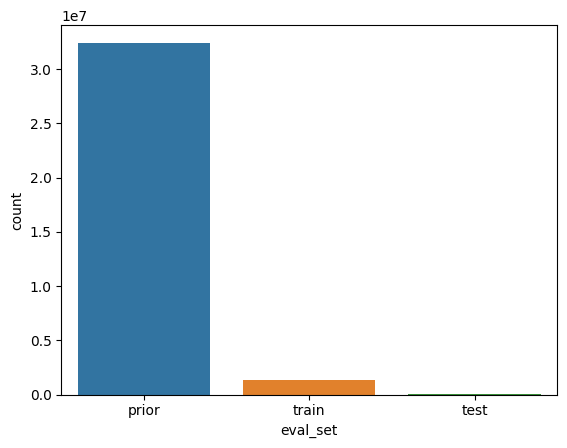

In [15]:
# eval_set 분포 확인
sns.countplot(x=total.eval_set)
plt.xlabel("eval_set")
plt.ylabel("count")
plt.show()

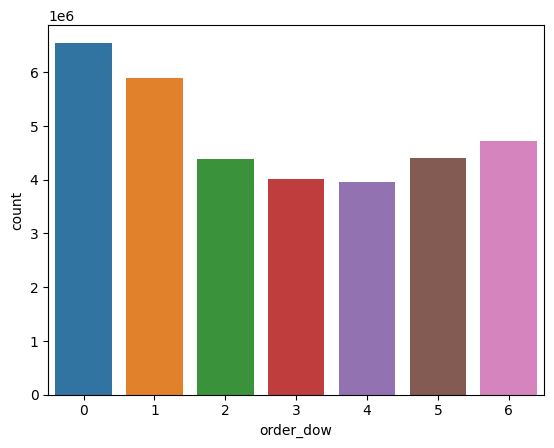

In [16]:
# order_dow 분포 확인
sns.countplot(x=total.order_dow)
plt.xlabel("order_dow")
plt.ylabel("count")
plt.show()

### 일요일에 구매하는 사람이 가장 많음.

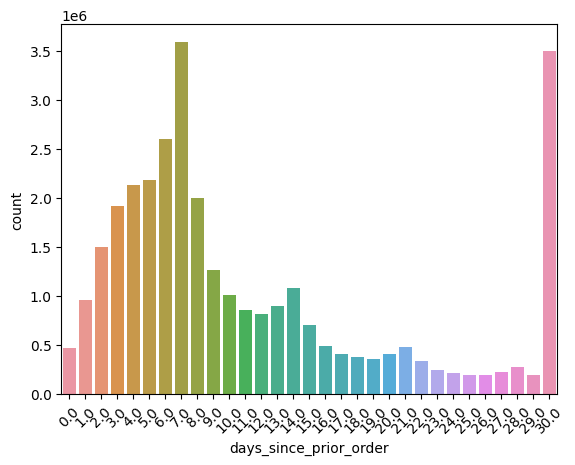

In [17]:
# days_since_prior_order 분포 확인
sns.countplot(x=total.days_since_prior_order)
plt.xlabel("days_since_prior_order")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

### 마지막 구매로부터 30일 이후 구매자가 가장 많음.

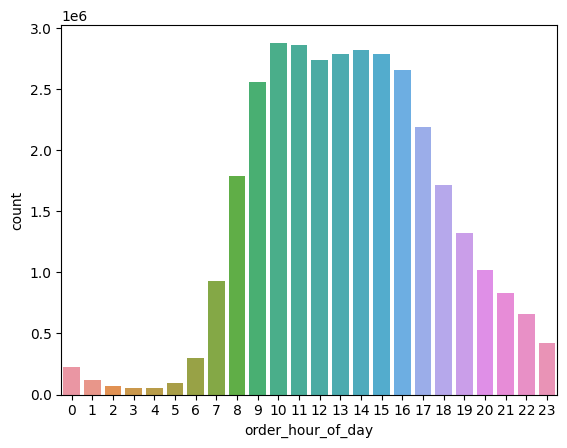

In [18]:
# order_hour_of_day 분포 확인
sns.countplot(x=total.order_hour_of_day.values)
plt.xlabel("order_hour_of_day")
plt.ylabel("count")
plt.show()

### 09시~16시 사이에 구매하는 사람이 많음.

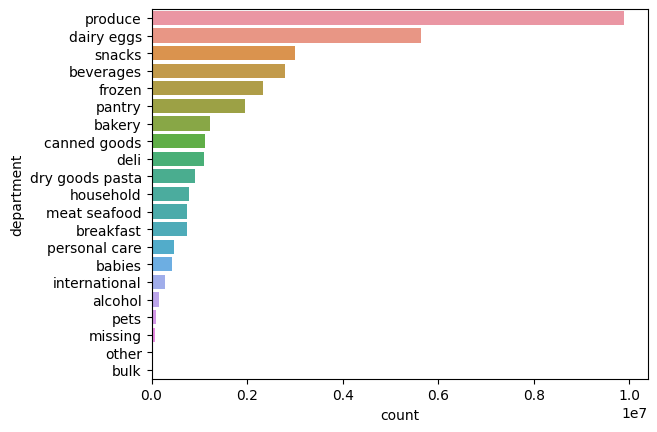

In [19]:
# department 분포 확인
total_dep = total['department'].value_counts().reset_index()
total_dep.columns = ['department', 'count']

sns.barplot(x='count', y='department', data=total_dep)
plt.xlabel("count")
plt.ylabel("department")
plt.show()

### produce의 판매량이 가장 많음.

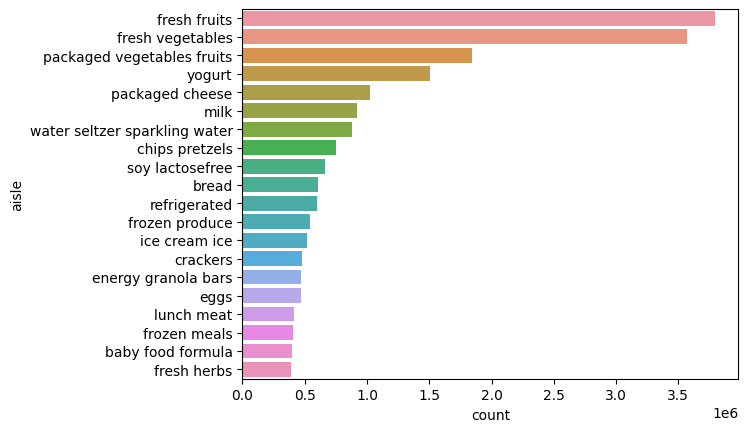

In [20]:
# aisle 분포 확인
total_cat = total['aisle'].value_counts().head(20).reset_index()
total_cat.columns = ['category', 'count']

sns.barplot(x='count', y='category', data=total_cat)
plt.xlabel("count")
plt.ylabel("aisle")
plt.show()

### fresh fruits의 판매량이 가장 많음.

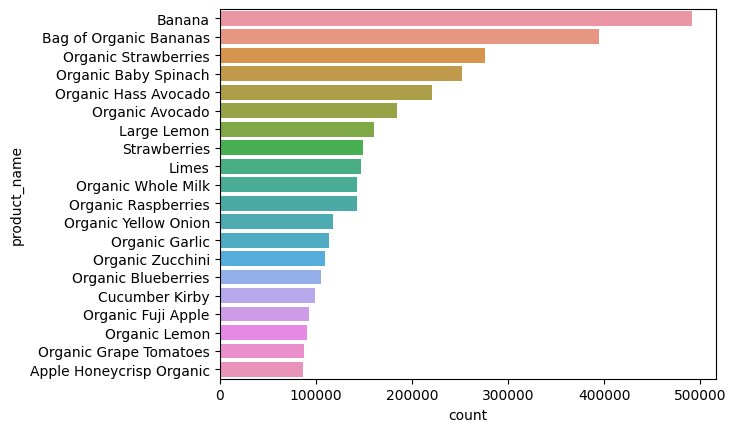

In [21]:
# product_name 분포 확인
total_sort = total['product_name'].value_counts().head(20).reset_index()
total_sort.columns = ['product', 'count']

sns.barplot(x='count', y='product', data=total_sort)
plt.xlabel("count")
plt.ylabel("product_name")
plt.show()

### Banana의 판매량이 가장 많음.

per_reordered: 0.5888


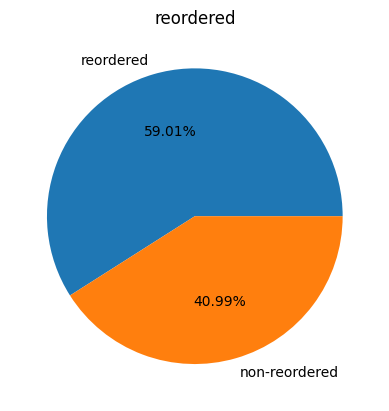

In [22]:
# 재구매율: reordered==1인 비율
print("per_reordered:", round(total.reordered.sum()/len(total.reordered), 4))

plt.pie([len(total[total["reordered"]==1]), len(total[total["reordered"]==0])], labels=["reordered", "non-reordered"], autopct="%.2f%%")
plt.title("reordered")
plt.show()

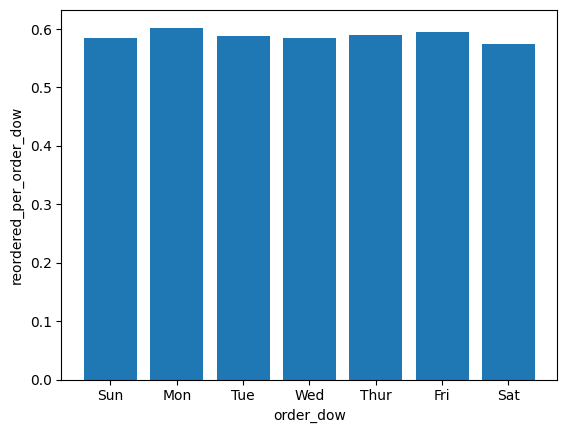

In [23]:
# order_dow별 reordered
reordered_per_order_dow = total[total["reordered"]==1].groupby("order_dow").size() / total.groupby("order_dow").size()

plt.bar(reordered_per_order_dow.index, reordered_per_order_dow)
plt.xlabel("order_dow")
plt.ylabel("reordered_per_order_dow")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"])
plt.show()

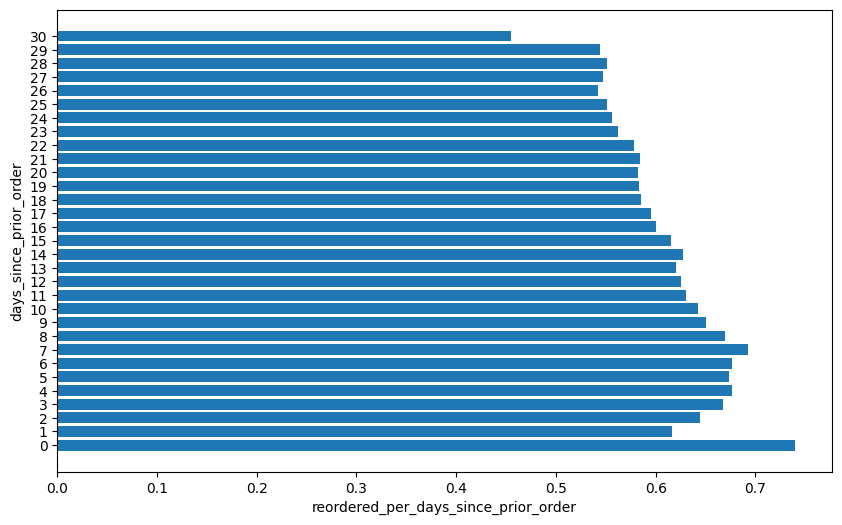

In [24]:
# days_since_prior_order별 reordered
reordered_per_days_since_prior_order = total[total["reordered"]==1].groupby("days_since_prior_order").size() / total.groupby("days_since_prior_order").size()

plt.figure(figsize=(10, 6))
plt.barh(reordered_per_days_since_prior_order.index, reordered_per_days_since_prior_order)
plt.xlabel("reordered_per_days_since_prior_order")
plt.ylabel("days_since_prior_order")
plt.yticks(range(31))
plt.show()

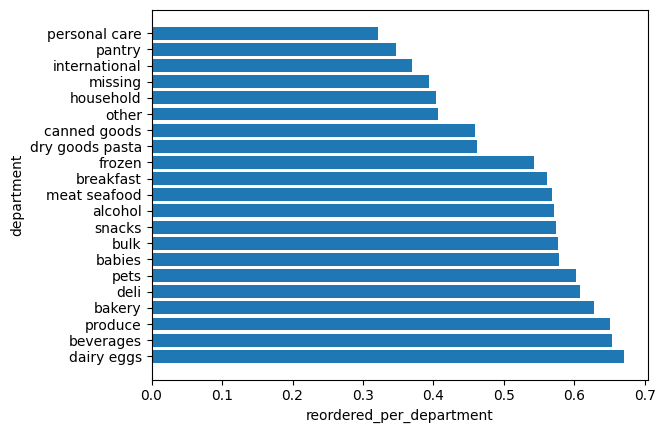

In [25]:
# department별 reordered
reordered_per_department = total[total["reordered"]==1].groupby("department").size() / total.groupby("department").size()
reordered_per_department = reordered_per_department.sort_values(ascending=False)

plt.barh(reordered_per_department.index, reordered_per_department)
plt.xlabel("reordered_per_department")
plt.ylabel("department")
plt.show()

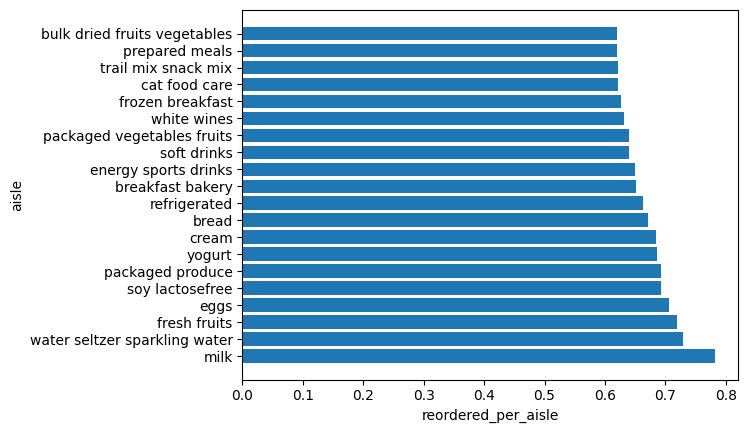

In [26]:
# aisle별 reordered
reordered_per_aisle = total[total["reordered"]==1].groupby("aisle").size() / total.groupby("aisle").size()
reordered_per_aisle = reordered_per_aisle.sort_values(ascending=False)[:20]

plt.barh(reordered_per_aisle.index, reordered_per_aisle)
plt.xlabel("reordered_per_aisle")
plt.ylabel("aisle")
plt.show()

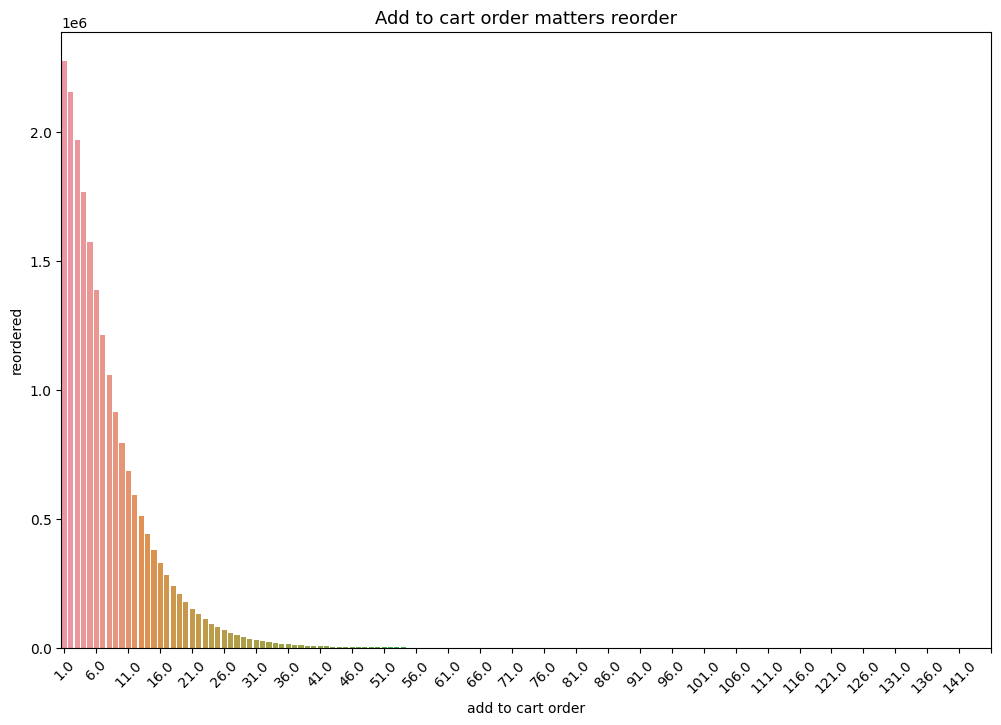

In [27]:
# add_to_cart_order에 따른 reordered

addtocart = total.groupby("add_to_cart_order")["reordered"].sum().reset_index()
addtocart.columns = ["add_to_cart_order", "reordered"]
addtocart

plt.figure(figsize=(12,8))
sns.barplot(x = "add_to_cart_order", y = "reordered", data = addtocart)
plt.xlabel('add to cart order')
plt.ylabel('reordered')
plt.title("Add to cart order matters reorder", fontsize=13)
plt.xticks(np.arange(0,146,5),rotation=45)

plt.show()

In [28]:
# 재구매율이 높은 상품

reorder_merged = total.groupby('product_name')['reordered'].agg(['sum', 'size']).reset_index()
reorder_merged.columns = ['product', 'reorder_sum', 'total_count']
reorder_merged = reorder_merged[reorder_merged['total_count'] >= 1000]
reorder_merged['ratio'] = reorder_merged['reorder_sum'] / reorder_merged['total_count']
reorder_ranking = reorder_merged.drop(["reorder_sum", "total_count"], axis=1).sort_values(by='ratio', ascending=False).round(2)

reorder_ranking[:10]

,product,ratio
19078,Half And Half Ultra Pasteurized,0.86
48793,Whole Organic Omega 3 Milk,0.86
30559,Organic Lactose Free Whole Milk,0.86
30365,Organic Homogenized Whole Milk,0.86
46502,Ultra-Purified Water,0.86
25591,"Milk, Organic, Vitamin D",0.85
31481,Organic Reduced Fat Milk,0.85
17777,Goat Milk,0.85
3677,Banana,0.85
30699,Organic Lowfat 1% Milk,0.84


# 4. Data Preprocessing

In [29]:
# 필요한 변수 선택 및 정렬

total = total[["order_id","user_id","product_id","order_number","add_to_cart_order","eval_set","order_dow","order_hour_of_day","days_since_prior_order","reordered"]]

In [30]:
# 고객 별 특정 상품의 재주문 비율 및 장바구니 추가 순서 평균
by_user = total.groupby(['user_id', 'product_id']).agg({'reordered': 'mean', 'add_to_cart_order': 'mean'}).reset_index()
by_user

,user_id,product_id,reordered,add_to_cart_order
0,1,196.0,0.909091,1.363636
1,1,10258.0,0.900000,3.600000
2,1,10326.0,0.000000,5.000000
3,1,12427.0,0.900000,3.300000
4,1,13032.0,0.750000,6.500000
...,...,...,...,...
13863741,206209,43961.0,0.666667,8.000000
13863742,206209,44325.0,0.000000,8.000000
13863743,206209,48370.0,0.000000,8.000000
13863744,206209,48697.0,0.000000,6.000000


In [31]:
# 상품 별 재구매율

reorder_pro = total.groupby('product_id')['reordered'].agg(['sum', 'size']).reset_index()
reorder_pro.columns = ['product_id', 'reorder_sum', 'total_count']

reorder_pro['reorder_ratio_by_product'] = reorder_pro['reorder_sum'] / reorder_pro['total_count']
reorder_pro = reorder_pro.drop(["reorder_sum", "total_count"], axis=1).sort_values(by='reorder_ratio_by_product', ascending=False).round(2)

reorder_pro[:10]

,product_id,reorder_ratio_by_product
6431,6433.0,0.94
2074,2075.0,0.93
43550,43553.0,0.92
27737,27740.0,0.92
14606,14609.0,0.91
13872,13875.0,0.91
39989,39992.0,0.91
5866,5868.0,0.90
36540,36543.0,0.90
26090,26093.0,0.90


In [32]:
by_user3 = pd.merge(by_user, reorder_pro, on = "product_id", how = "left")
# by_user3.loc[by_user3["reordered"] > by_user3["reorder_ratio_by_product"]]
by_user3.columns = ['user_id', 'product_id', 'reordered_prior', 'add_to_cart_order',
       'reorder_ratio_by_product']

In [33]:
reorder_user = total.groupby("user_id")["reordered"].mean().reset_index()
reorder_user.columns = ["user_id", "reorder_ratio_by_user"]
result = pd.merge(by_user3, reorder_user, on = "user_id", how = "left")
result

,user_id,product_id,reordered_prior,add_to_cart_order,reorder_ratio_by_product,reorder_ratio_by_user
0,1,196.0,0.909091,1.363636,0.78,0.728571
1,1,10258.0,0.900000,3.600000,0.72,0.728571
2,1,10326.0,0.000000,5.000000,0.65,0.728571
3,1,12427.0,0.900000,3.300000,0.74,0.728571
4,1,13032.0,0.750000,6.500000,0.66,0.728571
...,...,...,...,...,...,...
13863741,206209,43961.0,0.666667,8.000000,0.63,0.474453
13863742,206209,44325.0,0.000000,8.000000,0.40,0.474453
13863743,206209,48370.0,0.000000,8.000000,0.70,0.474453
13863744,206209,48697.0,0.000000,6.000000,0.36,0.474453


In [34]:
total2 = total.drop(["add_to_cart_order"],axis=1)
total = pd.merge(total2, result, on=['user_id', 'product_id'], how='left')

##### prior 기준으로 뽑아낸 변수들을 train에 라벨링해서 학습시키면 될지도?

In [35]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from gensim.models import Word2Vec

In [36]:
# product = pro.copy()


In [37]:
# # 텍스트 클리닝 함수 정의

# def clean_product_name(product_name):
#     # 소문자 변환
#     product_name = product_name.lower()
    
#     # 특수문자 제거
#     product_name = re.sub(r'[^a-zA-Z0-9\s]', '', product_name)
    
#     # 불용어 제거
#     stop_words = set(stopwords.words('english'))
#     words = word_tokenize(product_name)
#     product_name = ' '.join([word for word in words if word not in stop_words])
    
#     return product_name



In [38]:
# product['clean_product_name'] = product['product_name'].apply(clean_product_name)

In [39]:
# # Word2Vec 모델 구성
# sentences = [word_tokenize(name) for name in product['clean_product_name']]
# model = Word2Vec(sentences, vector_size=20, window=5, min_count=1, workers=4, sg=1)

# product_vectors = []
# for name in sentences:
#     vectors = [model.wv[word] for word in name]
#     product_vector = sum(vectors) / len(vectors)  # 단어 벡터의 평균을 상품명 벡터로 사용
#     product_vectors.append(product_vector)

# product['vectors'] = product_vectors
# # 결과 확인
# product.head()

In [40]:
# product['vectors'].iloc[0]

In [41]:

# for dim in range(len(product['vectors'].iloc[0])):
#     product[dim] = product['vectors'].apply(lambda x: x[dim])

In [42]:
# product = product[['product_name',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
# product

In [43]:
# # merged_train = pd.merge(merged_train,product)
# merged_train.drop(['product_name','eval_set'], axis = 1, inplace=True)
# merged_train

## XGBoosting

In [44]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier


In [45]:
train = total.loc[total.eval_set == "train",:]
train.drop(['eval_set', 'order_id'], axis=1, inplace=True)
train['product_id'] = train['product_id'].astype(int)
train = train.set_index(['user_id','product_id'])


test = total.loc[total.eval_set == "test",:]

C:\Users\NT-095\AppData\Local\Temp\ipykernel_1572\1575269321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['eval_set', 'order_id'], axis=1, inplace=True)
C:\Users\NT-095\AppData\Local\Temp\ipykernel_1572\1575269321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['product_id'] = train['product_id'].astype(int)


In [46]:
train[:10]

order_number  order_dow  order_hour_of_day  \
user_id product_id                                               
1       196                   11          4                  8   
        25133                 11          4                  8   
        38928                 11          4                  8   
        26405                 11          4                  8   
        39657                 11          4                  8   
        10258                 11          4                  8   
        13032                 11          4                  8   
        26088                 11          4                  8   
        27845                 11          4                  8   
        49235                 11          4                  8   

                    days_since_prior_order  reordered  reordered_prior  \
user_id product_id                                                       
1       196                           14.0        1.0         0.909091   
        25133                         14.0        1.0         0.888889   
        38928                         14.0        1.0         0.500000   
        26405                         14.0        1.0         0.666667   
        39657                         14.0        1.0         0.500000   
        10258                         14.0        1.0         0.900000   
        13032                         14.0        1.0         0.750000   
        26088                         14.0        1.0         0.666667   
        27845                         14.0        0.0         0.000000   
        49235                         14.0        1.0         0.666667   

                    add_to_cart_order  reorder_ratio_by_product  \
user_id product_id                                                
1       196                  1.363636                      0.78   
        25133                3.777778                      0.74   
        38928                3.500000                      0.83   
        26405                4.666667                      0.45   
        39657                4.000000                      0.77   
        10258                3.600000                      0.72   
        13032                6.500000                      0.66   
        26088                5.666667                      0.54   
        27845                9.000000                      0.83   
        49235                5.666667                      0.78   

                    reorder_ratio_by_user  
user_id product_id                         
1       196                      0.728571  
        25133                    0.728571  
        38928                    0.728571  
        26405                    0.728571  
        39657                    0.728571  
        10258                    0.728571  
        13032                    0.728571  
        26088                    0.728571  
        27845                    0.728571  
        49235                    0.728571

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('reordered', axis=1), train.reordered,
                                                    test_size=0.3, random_state=42)

In [48]:
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid, y_valid)
d_test = xgb.DMatrix(test.drop(['eval_set', 'order_id','reordered'], axis=1))


[0]	train-logloss:0.59815	eval-logloss:0.59815
[1]	train-logloss:0.52035	eval-logloss:0.52035
[2]	train-logloss:0.45547	eval-logloss:0.45547
[3]	train-logloss:0.40062	eval-logloss:0.40062
[4]	train-logloss:0.35377	eval-logloss:0.35377
[5]	train-logloss:0.34580	eval-logloss:0.34578
[6]	train-logloss:0.30651	eval-logloss:0.30649
[7]	train-logloss:0.27239	eval-logloss:0.27238
[8]	train-logloss:0.24261	eval-logloss:0.24260
[9]	train-logloss:0.21649	eval-logloss:0.21648
[10]	train-logloss:0.19350	eval-logloss:0.19349
[11]	train-logloss:0.17319	eval-logloss:0.17318
[12]	train-logloss:0.15520	eval-logloss:0.15519
[13]	train-logloss:0.13923	eval-logloss:0.13922
[14]	train-logloss:0.13599	eval-logloss:0.13599
[15]	train-logloss:0.13348	eval-logloss:0.13351
[16]	train-logloss:0.11989	eval-logloss:0.11991
[17]	train-logloss:0.10777	eval-logloss:0.10779
[18]	train-logloss:0.09694	eval-logloss:0.09696
[19]	train-logloss:0.08725	eval-logloss:0.08727
[20]	train-logloss:0.07857	eval-logloss:0.07859
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

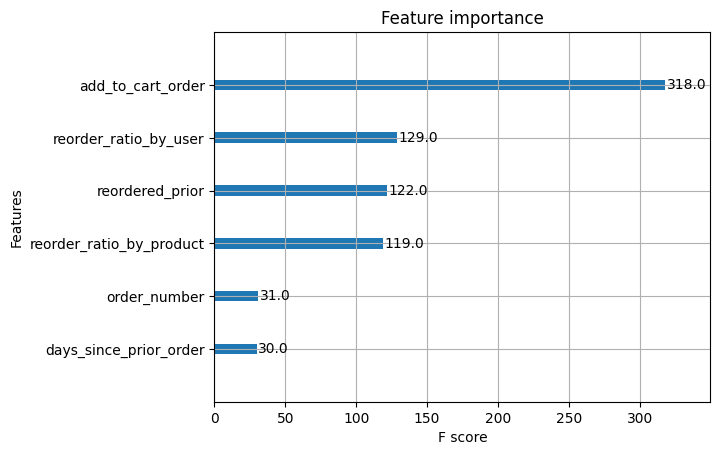

In [60]:
xgb_params = {
    "objective"         : "binary:logistic"
    ,"eval_metric"      : "logloss"
    ,"eta"              : 0.1
    ,"max_depth"        : 5
    ,"min_child_weight" :5
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.7
    ,"alpha"            :2e-03
    ,"lambda"           :10
}

model = xgb.train(params=xgb_params, dtrain=d_train, num_boost_round=200, early_stopping_rounds= 100, evals=[(d_train,'train'),(d_valid,'eval')])
xgb.plot_importance(model)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# param_xgb = {"max_depth": [3,5,10],
#               "min_child_weight" : [1,3,5],
#               "n_estimators": [200,300,500]
#               } 

# xgb2 = XGBClassifier()

# gridcv = GridSearchCV (estimator = xgb2, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)

In [52]:
# gridcv.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=200; total time=   8.3s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=200; total time=   8.3s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=200; total time=   9.8s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=300; total time=  14.2s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=300; total time=  14.0s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=300; total time=  13.8s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=500; total time=  23.4s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=500; total time=  22.3s
[CV] END ..max_depth=3, min_child_weight=1, n_estimators=500; total time=  21.3s
[CV] END ..max_depth=3, min_child_weight=3, n_estimators=200; total time=   9.4s
[CV] END ..max_depth=3, min_child_weight=3, n_estimators=200; total time=   9.7s
[CV] END ..max_depth=3, min_child_weight=3, n_es

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'max_depth': [3, 5, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [200, 300, 500]},
             scoring='accuracy', verbose=2)

In [62]:
# gridcv.best_params_
gridcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
# import pickle
# best_params = gridcv.best_params_

# with open('best_params.pkl', 'wb') as f:
#     pickle.dump(best_params, f)

In [56]:
with open('best_params.pkl', 'rb') as f:
    best_params = pickle.load(f)

In [59]:
best_params

{'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}

[0]	train-logloss:0.59814	eval-logloss:0.59814
[1]	train-logloss:0.52033	eval-logloss:0.52033
[2]	train-logloss:0.45545	eval-logloss:0.45545
[3]	train-logloss:0.40060	eval-logloss:0.40060
[4]	train-logloss:0.35375	eval-logloss:0.35375
[5]	train-logloss:0.31339	eval-logloss:0.31339
[6]	train-logloss:0.27839	eval-logloss:0.27839
[7]	train-logloss:0.24786	eval-logloss:0.24786
[8]	train-logloss:0.22110	eval-logloss:0.22110
[9]	train-logloss:0.19756	eval-logloss:0.19756
[10]	train-logloss:0.17678	eval-logloss:0.17678
[11]	train-logloss:0.15839	eval-logloss:0.15839
[12]	train-logloss:0.14206	eval-logloss:0.14206
[13]	train-logloss:0.12754	eval-logloss:0.12754
[14]	train-logloss:0.11460	eval-logloss:0.11460
[15]	train-logloss:0.10304	eval-logloss:0.10304
[16]	train-logloss:0.09272	eval-logloss:0.09272
[17]	train-logloss:0.08347	eval-logloss:0.08347
[18]	train-logloss:0.07519	eval-logloss:0.07519
[19]	train-logloss:0.06776	eval-logloss:0.06776
[20]	train-logloss:0.06109	eval-logloss:0.06109
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

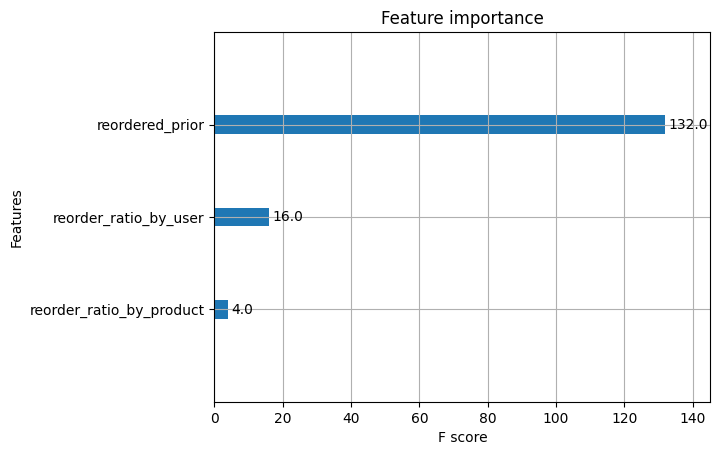

In [57]:
xgb_params = {
    "objective"         : "binary:logistic"
    ,"eval_metric"      : "logloss"
    ,"eta"              : 0.1
    ,"max_depth"        : 3
    ,"min_child_weight" : 1
    # ,"gamma"            :0.70
    # ,"subsample"        :0.76
    # ,"colsample_bytree" :0.7
    # ,"alpha"            :2e-03
    # ,"lambda"           :10
}

model = xgb.train(params=xgb_params, dtrain=d_train, num_boost_round=200, early_stopping_rounds= 100, evals=[(d_train,'train'),(d_valid,'eval')])
xgb.plot_importance(model)

In [58]:
y_pred = model.predict(d_valid)
print(y_pred)


[2.1308538e-06 9.9999845e-01 9.9999785e-01 ... 9.9999857e-01 9.9999845e-01
 9.9999857e-01]


In [ ]:
pred_probs = model.predict(d_valid)
y_pred = [1 if x > 0.5 else 0 for x in pred_probs]

CMStat.get_clf_eval(y_valid, y_pred, pred_probs)


In [ ]:
test['reordered'] = (model.predict(d_valid) > 0.1).astype(int)
test['product_id'] = None

In [ ]:
test

In [ ]:
sample = pd.read_csv("sample_submission.csv")

In [ ]:
sample[["order_id","products"]] = None

In [ ]:
sample['order_id'] = test[test.reordered == 1]['order_id']

In [ ]:
sample